In [38]:
# Load packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, linear_model, tree
from sklearn import metrics
import pandas as pd
import matplotlib as plt

In [12]:
# Load dataset
iris = pd.read_csv('iris.csv')

# Explore dataset
print(iris)
print(iris.describe())
print(set(iris['variety']))

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.05

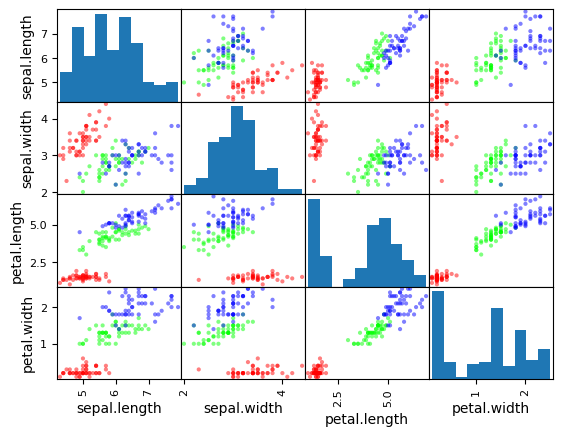

In [11]:
# Create colour array for plotting
colrs = []
flowers = iris['variety'].tolist()
hashmap = {'Setosa': '#FF0000',
           'Virginica': '#0000FF',
           'Versicolor': '#00FF00'}

for x in flowers:
    colrs.append(hashmap.get(x))
    
# Plot dataset (semi colon hides text output)
pd.plotting.scatter_matrix(iris.iloc[:, 0:4], color = colrs);

In [44]:

# Create training and test portions
iris_train, iris_test = train_test_split(iris, train_size = 0.75, test_size = 0.25)
#print(iris_test.describe())
#print(iris_train.describe())

# Setup the estimator - trial a couple different estimators
# Regression
regClf = linear_model.LogisticRegression(max_iter=200)
# Support Vector Machine
svmClf = svm.SVC(gamma = 0.001, C = 100.)
# Decision tree
treeClf = tree.DecisionTreeClassifier()

# Now fit estimator to the model using the fit method
# Must pass the data to use to train, and the target to predict
regClf.fit(iris_train.iloc[:, 0:4], iris_train.iloc[:, 4])
svmClf.fit(iris_train.iloc[:, 0:4], iris_train.iloc[:, 4])
treeClf.fit(iris_train.iloc[:, 0:4], iris_train.iloc[:, 4])

DecisionTreeClassifier()

In [45]:
# Now make predictions using multiple models
regPreds = regClf.predict(iris_test.iloc[:,  0:4])
svmPreds = svmClf.predict(iris_test.iloc[:,  0:4])
treePreds = treeClf.predict(iris_test.iloc[:,  0:4])

In [46]:
# Assess performance of model

# Determine accuracy
regAccuracy = metrics.accuracy_score(iris_test.iloc[:,  4], regPreds)
print('Regression Accuracy:', regAccuracy)
svmAccuracy = metrics.accuracy_score(iris_test.iloc[:,  4], svmPreds)
print('SVM Accuracy:', svmAccuracy)
treeAccuracy = metrics.accuracy_score(iris_test.iloc[:,  4], treePreds)
print('Decision Tree Accuracy:', svmAccuracy)

# Plot confusion matrix
#confMat = metrics.confusion_matrix(iris_test.iloc[:,  4], svmPreds)
#print(confMat)


Regression Accuracy: 0.9473684210526315
SVM Accuracy: 1.0
Decision Tree Accuracy: 1.0


Trial k fold cross validation:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html